In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functions import rm
from xgboost import plot_importance
import shap

path_csv = "../../../Thesis_data/processed_data/"
path_model = "../../../Thesis_data/Models/"

C:\Users\Rvanl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\shap\utils\_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
C:\Users\Rvanl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\shap\utils\_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://

In [3]:
X_test_unscaled = pd.read_csv(path_csv + "ontime_reporting_X_test_unscaled.csv")
X_test = pd.read_csv(path_csv + "ontime_reporting_X_test.csv")
y_test = pd.read_csv(path_csv + "ontime_reporting_y_test.csv")

X_test = rm(X_test)
y_test = np.ravel(y_test)

Memory usage of dataframe is 314.23 MB
Memory usage after optimization is: 78.56 MB
Decreased by 75.0%


In [2]:
#Load airline full names
airlines = pd.read_csv("../_1. Data Preprocessing/UNIQUE_CARRIERS.csv")

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (5,) and arg 3 with shape (37,).

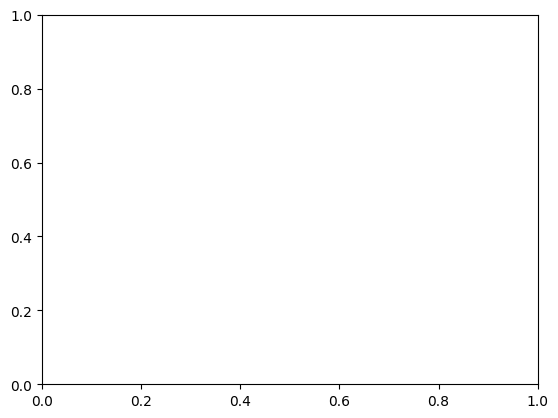

In [47]:
import torch
tabnet_tuned_rosrus = torch.load(path_model + "TabNet_tuned_ROSRUS.pt", map_location=torch.device('cpu'))
top_indices = np.argsort(tabnet_tuned_rosrus.feature_importances_)[::-1][:5]
#top_feature_names = [tabnet_tuned_rosrus.feature_names_in_[i] for i in top_indices]
top_feature_importances = tabnet_tuned_rosrus.feature_importances_[top_indices]

plt.barh(range(len(tabnet_tuned_rosrus.feature_importances_)), top_feature_importances)

Trying to unpickle estimator DecisionTreeClassifier from version 1.2.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator RandomForestClassifier from version 1.2.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


Text(0.5, 1.0, 'Top 10 Feature Importances')

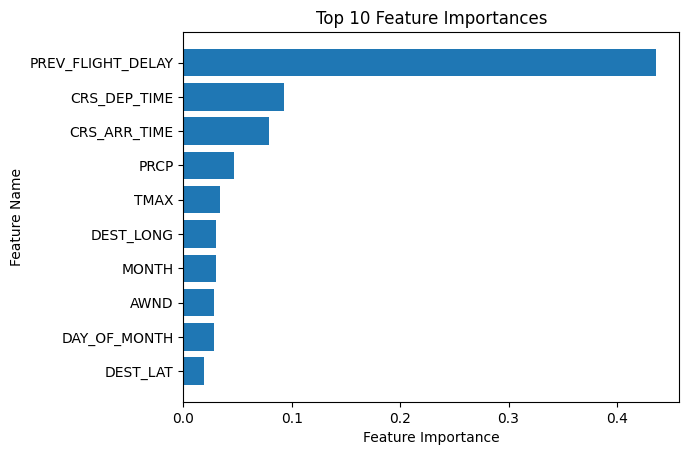

In [8]:
rf_tuned_rosrus = joblib.load(path_model + "rf_tuned_ROS.joblib")
top_indices = np.argsort(rf_tuned_rosrus.feature_importances_)[::-1][:10]
top_feature_names = [rf_tuned_rosrus.feature_names_in_[i] for i in top_indices]
top_feature_importances = rf_tuned_rosrus.feature_importances_[top_indices]
top_feature_names.reverse()
top_feature_importances = np.flip(top_feature_importances)

plt.barh(top_feature_names, top_feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Top 10 Feature Importances')

[13:19:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\gbm\gbtree.cc:385: Changing updater from `grow_gpu_hist` to `grow_quantile_histmaker`.
[13:19:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\context.cc:44: No visible GPU is found, setting device to CPU.


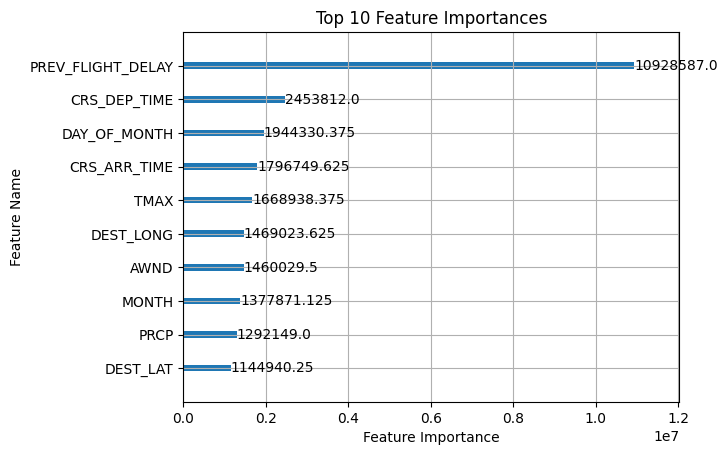

In [10]:
xgb_class_tuned_ros = joblib.load(path_model + "XGBoost_tuned_ROS.joblib")
#y_pred_xgb_tuned_ros = xgb_class_tuned_ros.predict(X_test)
#y_pred_prob_xgb_tuned_ros = xgb_class_tuned_ros.predict_proba(X_test)[:, 1]

plot_importance(xgb_class_tuned_ros.get_booster().get_score(importance_type='total_gain'), max_num_features=10)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Top 10 Feature Importances')
plt.show()

Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


Text(0.5, 1.0, 'Top 10 Feature Importances (Absolute Values)')

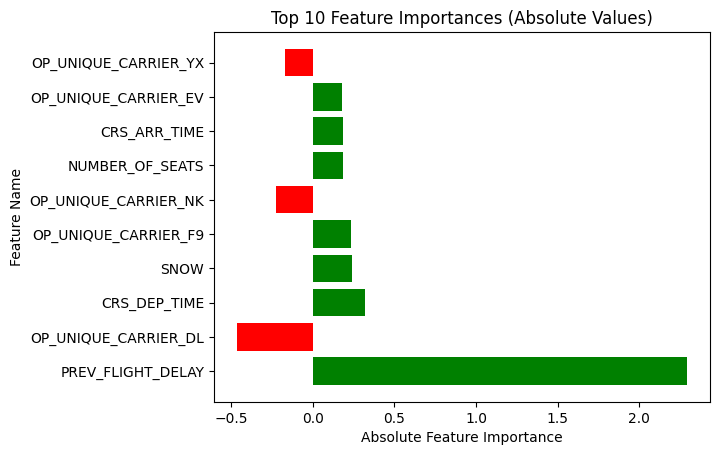

In [16]:
#plt.barh(rf_tuned_rosrus.feature_names_in_, rf_tuned_rosrus.feature_importances_)
#plt.barh(logreg_tuned_imbalance.feature_names_in_, logreg_tuned_imbalance.coef_[0])

logreg_tuned_imbalance = joblib.load(path_model + "logreg_tuned_ROS.joblib")
top_indices = np.argsort(np.abs(logreg_tuned_imbalance.coef_[0]))[::-1][:10]

top_feature_names = [logreg_tuned_imbalance.feature_names_in_[i] for i in top_indices]
top_feature_coefficients = logreg_tuned_imbalance.coef_[0][top_indices]

top_feature_signs = np.sign(top_feature_coefficients)

plt.barh(top_feature_names, top_feature_coefficients, color=np.where(top_feature_signs == 1, 'g', 'r'))
plt.xlabel('Absolute Feature Importance')
plt.ylabel('Feature Name')
plt.title('Top 10 Feature Importances (Absolute Values)')

In [13]:
y_diff = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred_xgb_tuned_ros})
y_diff['Difference'] = np.where(y_diff['y_test'] == y_diff['y_pred'], 0, 1) #0 means no difference, 1 means a difference
merged_df = X_test_unscaled.merge(y_diff, left_index=True, right_index=True)
merged_df = merged_df.merge(airlines, left_on="OP_UNIQUE_CARRIER", right_on="Code")

In [16]:
merged_df = merged_df.merge(airlines, left_on="OP_UNIQUE_CARRIER", right_on="Code")
merged_df

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE_GROUP,NUMBER_OF_SEATS,AWND,PRCP,...,ORIGIN_LONG,DEST_LAT,DEST_LONG,PREV_FLIGHT_DELAY,PLANE_AGE,y_test,y_pred,Difference,Code,Description
0,8,15,4,9E,501,630,5,76,6.49,0.32,...,-83.3533,29.9844,-95.3414,0,13,0,0,0,9E,Endeavor Air Inc.
1,8,17,6,9E,690,813,3,76,8.05,0.44,...,-81.8498,42.3643,-71.0052,0,5,1,1,0,9E,Endeavor Air Inc.
2,10,8,2,9E,1302,1404,2,76,8.50,0.01,...,-71.0052,42.9405,-78.7322,0,11,0,0,0,9E,Endeavor Air Inc.
3,6,13,4,9E,787,883,2,76,11.41,0.08,...,-84.6678,38.8522,-77.0378,0,11,1,0,1,9E,Endeavor Air Inc.
4,11,25,1,9E,1235,1352,3,76,8.95,0.00,...,-83.3533,40.6397,-73.7789,0,5,0,0,0,9E,Endeavor Air Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113144,12,4,3,EV,870,1096,5,70,8.28,0.00,...,-95.3414,41.4117,-81.8498,0,0,0,0,0,EV,ExpressJet Airlines LLC d/b/a aha!
1113145,11,20,3,EV,540,660,4,70,3.80,0.01,...,-84.6678,29.9844,-95.3414,0,0,0,0,0,EV,ExpressJet Airlines LLC d/b/a aha!
1113146,2,22,5,EV,610,745,3,50,7.61,0.00,...,-87.9047,36.1984,-95.8881,0,18,0,0,0,EV,ExpressJet Airlines LLC d/b/a aha!
1113147,5,25,6,EV,360,474,3,50,8.50,0.04,...,-84.2194,40.6925,-74.1686,0,15,1,1,0,EV,ExpressJet Airlines LLC d/b/a aha!


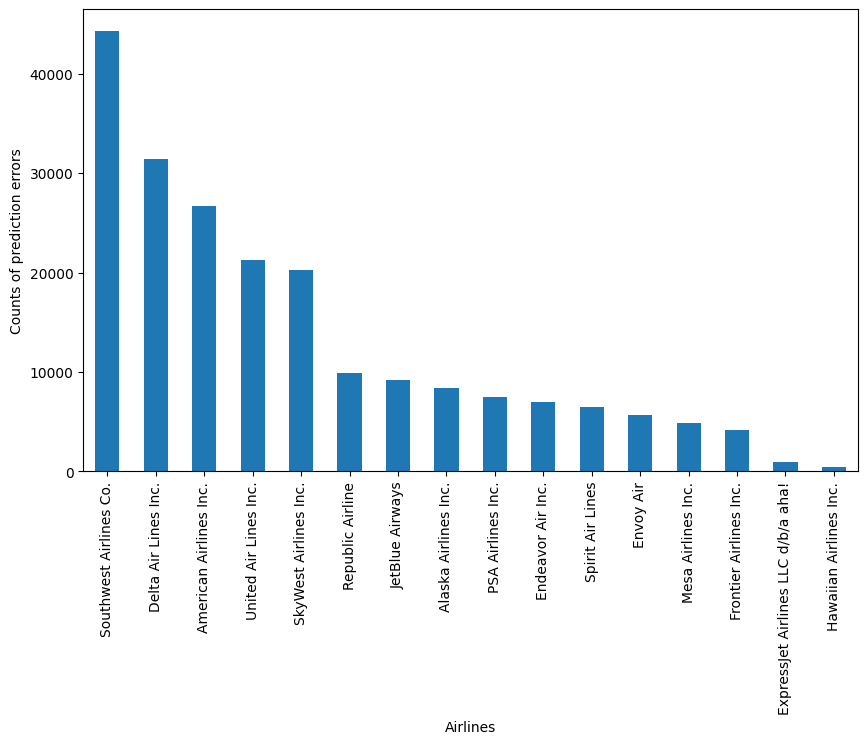

In [18]:
df_filtered = merged_df[merged_df["Difference"] == 1]

counts = df_filtered.groupby("Description")["Difference"].count()
counts = counts.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
counts.plot(kind="bar")
#plt.title("Count of 1s in binary_column per Airline")
plt.xlabel("Airlines")
plt.ylabel("Counts of prediction errors")
plt.xticks(rotation=90)
plt.show()

<Figure size 1000x600 with 0 Axes>

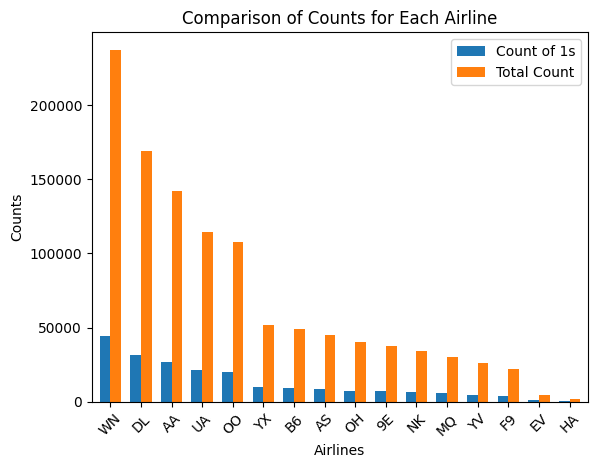

In [27]:
df_filtered = merged_df[merged_df["Difference"] == 1]

counts = df_filtered.groupby("OP_UNIQUE_CARRIER")["Difference"].count()
counts = counts.sort_values(ascending=False)

total_counts = merged_df.groupby("Description").size()

combined_counts = pd.concat([counts, total_counts], axis=1)
combined_counts.columns = ["Count of 1s", "Total Count"]

plt.figure(figsize=(10, 6))
combined_counts.plot(kind="bar", width=0.7)
plt.title("Comparison of Counts for Each Airline")
plt.xlabel("Airlines")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.show()

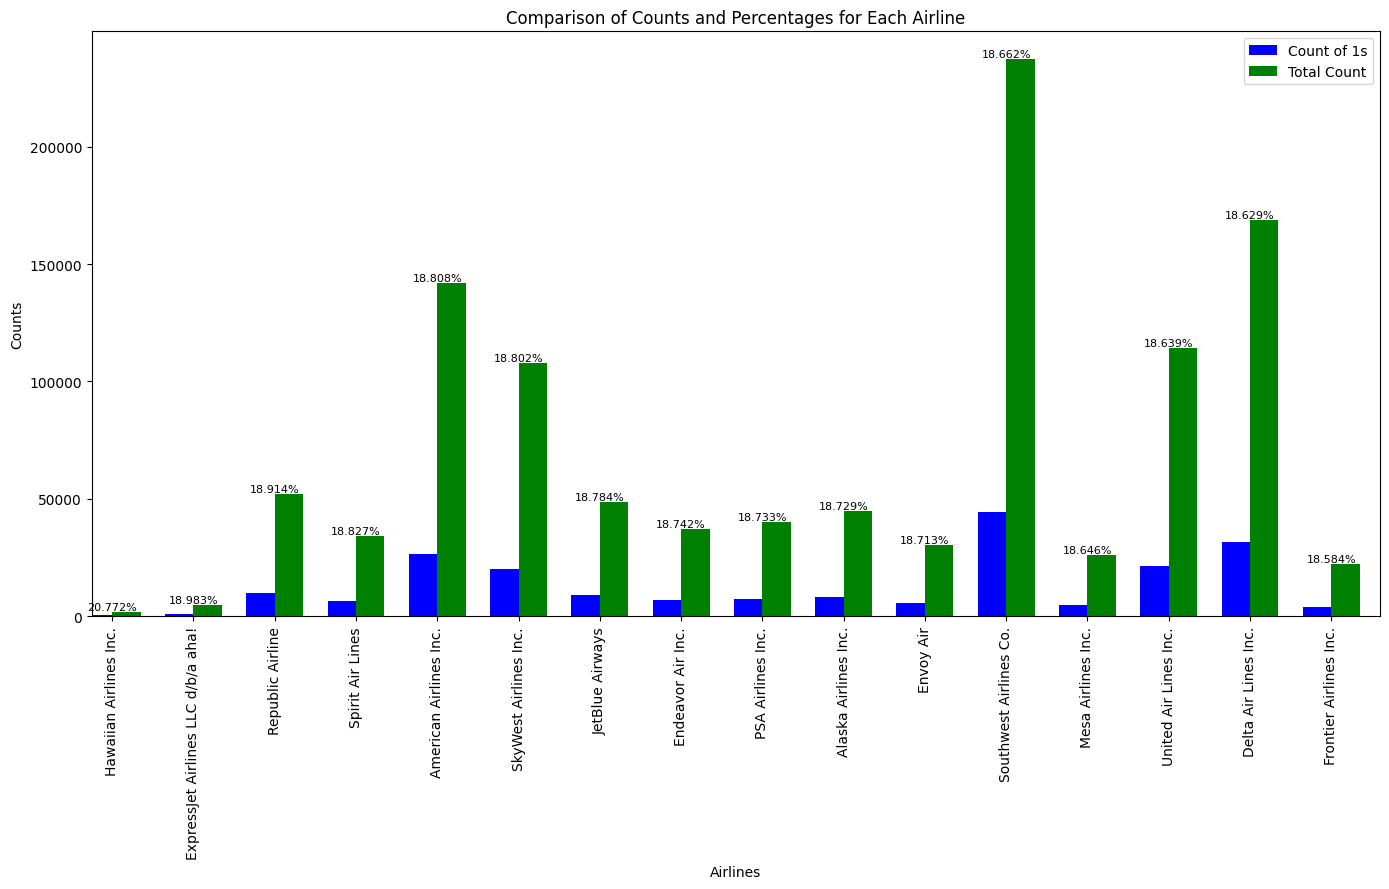

In [50]:
df_filtered = merged_df[merged_df["Difference"] == 1]

counts = df_filtered.groupby("Description")["Difference"].count()
counts = counts.sort_values(ascending=False)

total_counts = merged_df.groupby("Description").size()

combined_counts = pd.concat([counts, total_counts], axis=1)
combined_counts.columns = ["Count of 1s", "Total Count"]

def calculate_error_percentage(row):
    return round(((row['Count of 1s'] / row['Total Count']) * 100), 3)

combined_counts['error_percentage'] = combined_counts.apply(calculate_error_percentage, axis=1)

combined_counts = combined_counts.sort_values(by='error_percentage', ascending=False)

plt.figure(figsize=(14, 9))

combined_counts['Count of 1s'].plot(kind="bar", width=0.35, position=1, color='b', align='center', label='Count of 1s')
combined_counts['Total Count'].plot(kind="bar", width=0.35, position=0, color='g', align='center', label='Total Count')

for i, value in enumerate(combined_counts['error_percentage']):
    plt.text(i, max(combined_counts['Count of 1s'][i], combined_counts['Total Count'][i]) + 10, f"{value}%", ha='center', va='bottom', fontsize=8)

plt.title("Comparison of Counts and Percentages for Each Airline")
plt.xlabel("Airlines")
plt.ylabel("Counts")
plt.xticks(range(len(combined_counts.index)), combined_counts.index, rotation=90)
plt.legend()
plt.tight_layout()  # Adjust layout for better display
plt.show()